* After refitting MS with full mass range, and 
* redefining cut between normal and low SFR using where two gaussians overlap
* expanding cluster sample to not be restricted to where the mips scans were
* change B/T cut from 0.4 to 0.3

# To do 

1. [DONE] potentially refitting the main sequence; (Rose)
  * before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  this is what we eyeballed from topcat.
1. [DONE] using our double Gaussian fits to set up a boundary that is parallel to the MS, and offset based on the point where the two Gaussian fits cross.  this is not where the min is of the joint profile.  Need to plot each gaussian individually, then find where they cross (equal contribution from both populations), then fit a lit to these points vs logMstar; (Rose)
1. describing this process in the paper; (Greg and Benedetta)
1. Once we refit the main sequence, we need to recalculate the suppressed fractions and delta_sfr, and update the corresponding 
 1. plots and 
 2. numbers in the text.  (Rose)
1. implement mass matching throughout.  use Nfield/N_LCS to pick how many galaxies we select from field sample for mass matching. (Rose)
1. updating numbers in the paper accordingly; (Rose)
1. hopefully not having to update any of our conclusions:-) (Greg and Benedetta)
1. need to update for no BT cut and BT< 0.3 cut, and propagate. (Rose)
1. read through overleaf, and update discussion as necessary. (Greg and Benedetta)


# Summary 

This notebook shows the results if we use:

* MS fit by fitting peak of gaussian of SF population vs stellar mass.  We use the full GSWLC, with only a redshift cut applied to match the redshift range of LCS.  
* The details iare in the notebook fittingMainSequence
* This gives roughly
  * $ (0.56 +/- 0.01)*logMstar - (5.74+/- 0.12)$
  * the std of those gaussians is about 0.23.
  * both of these numbers depend somewhat on the exact mass range you use.  The SF peak is best defined with lower mass galaxies (like $logMstar < 10$), whereas the double peak is best defined with.
  * For example, if we fit using $9 < logMstar < 10.4$, we get a 
    * $ 0.61*logMstar - 6.20$
  * But we then need to use a different mass range to get the offset from the MS.
  * Problem is that the offset is approximately 2sigma from the center, so there is not much room between e.g. 1.5 sigma and 2 sigma - very narrow slice to define as suppressed galaxy.
* STD of main sequence varies with mass, probably because it's not actually linear.  It ranges from 0.2 at lower masses to 0.3 at higher masses.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
homedir = os.getenv("HOME")

In [7]:
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52


# Figure 1: SF Main sequence with full sample

to show division between SF and passive galaxies

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.56
Best-fit inter = -5.72
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.56+/-0.03
Best-fit inter = -5.72+/-0.33


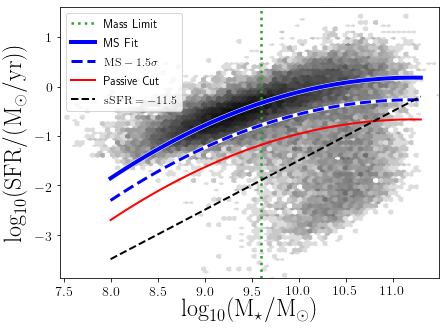

In [55]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.6 --ellip 0.75 --HIdef --minssfr -11.5
b.plot_full_ms()
#xline = np.linspace(8,11,100)
#yline = 0.61*xline-6.20
#plt.plot(xline,yline)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.61
Best-fit inter = -6.26
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.61+/-0.03
Best-fit inter = -6.26+/-0.32


<Figure size 489.6x360 with 0 Axes>

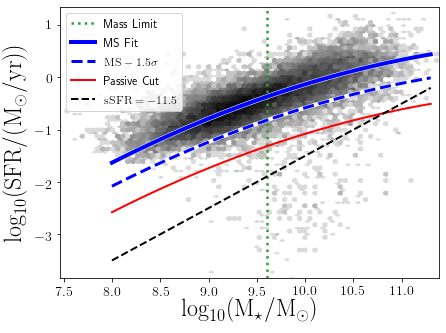

In [144]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.6 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
b.plot_full_ms()
#xline = np.linspace(8,11,100)
#yline = 0.61*xline-6.20
#plt.plot(xline,yline)

# Statistics

DONE - NEED TO REDO WITH MASS MATCHING ONLY

In [56]:
# write the tables that will be used to make the latex table

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5
b.ks_stats(massmatch=False)

print()
print()
print('##### WITH BT CUT #####')
print()
print()

%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5 --cutBT --BT 0.3
b.ks_stats(massmatch=False)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54


##### WITH BT CUT #####


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
#######

<Figure size 489.6x360 with 0 Axes>

In [57]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54
number of core galaxies =  137
	 with size measurements =  --
number of infall galaxies =  360
	 with size measurements =  --
number of GSW galaxies =  11118

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_

### Number with HI detections

In [61]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

print()
print('############# WITH BT CUT ###################')
print()
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.cat['HIdef_flag']))

print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.cat['HIdef_flag']))

print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag & b.gsw.HIdef['HIdef_flag']) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54
number of core galaxies =  22
number of infall galaxies =  94
number of GSW galaxies =  3172

############# WITH BT CUT ###################

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of prune

# Table 1

In [59]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 2.10e-01, pvalue = 1.29e-05
Anderson_ksampResult(statistic=16.791283243379553, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 2.11e-01, pvalue = 1.13e-05
Anderson_ksampResult(statistic=14.300699336151004, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.14e-01, pvalue = 5.87e-02
Anderson_ksampResult(statistic=1.6940679019326723, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.06498827261654676)

LCS Core vs Field: BT
	D = 1.48e-01, pvalue = 5.24e-03
Anderson_ksampResult(statistic=1.6940679019326723, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.06498827261654676)
########################################
LCS Infall vs Field: SFR
	D = 1.76e-01, pvalue = 8.08e-10

Anderson_ksampResult(statistic=6.360178421689098, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0011660606564572902)

LCS Infall vs Field: dSFR
	D = 1.81e-01, pvalue = 1.71e-03
Anderson_ksampResult(statistic=6.721019659670265, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Infall vs Field: Mstar
	D = 3.70e-02, pvalue = 9.99e-01
Anderson_ksampResult(statistic=-0.9976587393392884, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

LCS Infall vs Field: BT
	D = 1.48e-01, pvalue = 1.74e-02
Anderson_ksampResult(statistic=1.9799083090250922, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.049656338662373255)

CPU times: user 32.1 s, sys: 50.8 ms, total: 32.2 s
Wall time: 31.8 s


In [60]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-massmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 1.96e-01, pvalue = 6.31e-05
	AD D = 1.41e+01, pvalue = 1.00e-03

LCS Core vs Field: dSFR
	D = 2.16e-01, pvalue = 6.61e-06
	AD D = 1.50e+01, pvalue = 1.00e-03

LCS Core vs Field: Mstar
	D = 5.35e-02, pvalue = 8.23e-01
	AD D = -7.74e-01, pvalue = 2.50e-01

LCS Core vs Field: BT
	D = 1.58e-01, pvalue = 2.33e-03
	AD D = 8.20e+00, pvalue = 1.00e-03
########################################
LCS Infall vs Field: SFR
	D = 1.73e-01, pvalue = 1.73e-09
	AD D = 2.87e+01, pvalue = 1.00e-03

LCS Infall vs Field: dSFR
	D = 1.83e-01, pvalue = 1.41e-10
	AD D = 2.81e+01, pvalue = 1.00e-03

LCS Infall vs Field: Mstar
	D = 3.47e-02, pvalue = 7.95e-01
	AD D = -6.07e-01, pvalue = 2.50e-01

LCS Infall vs Field: BT
	D = 1.26e-01, pvalue = 3.18e-05
	AD D = 9.47e+00, pvalue = 1.00e-03

########################################
LCS Core vs Infall: SFR
	D = 6.63e-02, pvalue = 7.44e-01
	AD D = -5.02e-01, pvalue = 2.50e-01
LCS Core vs Infall: dSFR
	

#  Figure 2 - SFR vs Mstar

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.13
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.05
Best-fit inter = -4.13+/-0.54
number in lcs sample =  140
number in gsw sample =  11128
just checking ... 11127 140
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 6.251e-02 (prob that samples are from same distribution)
Anderson-Darling:  Anderson_ksampResult(statistic=1.7360807677320513, critical_values=arr

<Figure size 489.6x360 with 0 Axes>

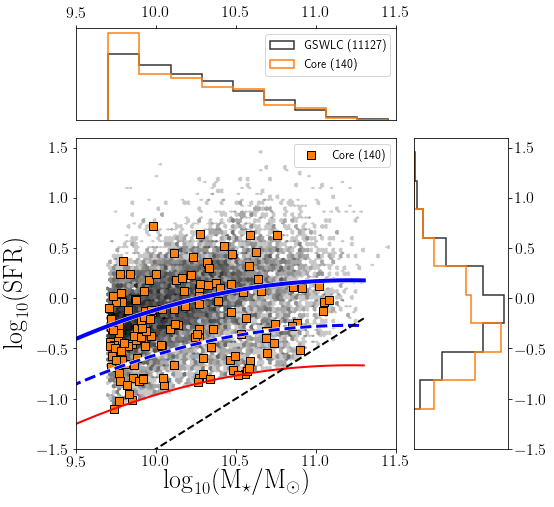

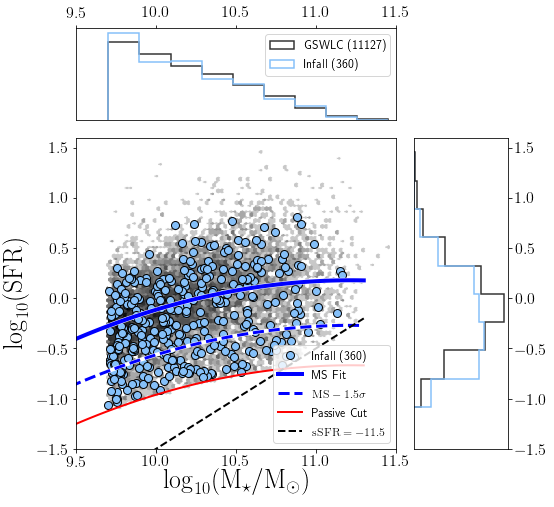

In [33]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5

mmatch = False
if mmatch:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)
else:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)
    

## With BT cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in lcs sample =  85
number in gsw sample =  7580
just checking ... 7580 85
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.15
p-vale = 4.429e-02 (prob that samples are from same distribution)
Anderson-Darling:  And

<Figure size 489.6x360 with 0 Axes>

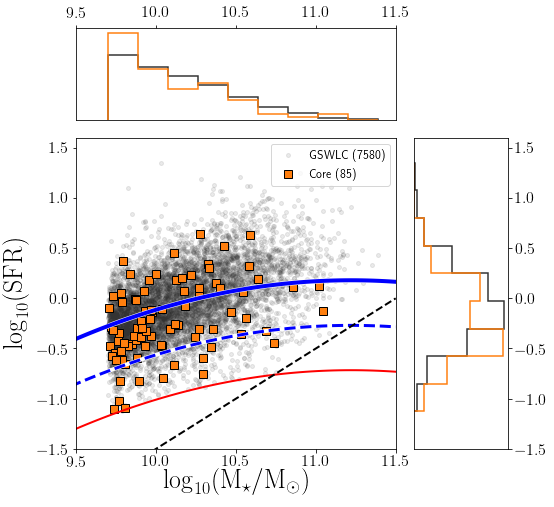

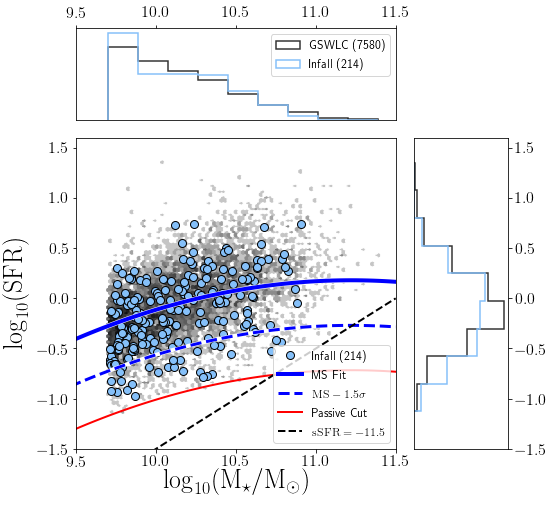

In [10]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.5 --cutBT --BT 0.3
mmatch=False

if mmatch:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75-mmatch.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=True)
else:
    flag = b.lcs.membflag 
    outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut03-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=True,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False,marker2='s')

    print("")
    print("")
    flag = b.lcs.infallflag 
    outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut03-e0p75.png'
    b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)


# Figure 3 - dSFR hist

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54

Field: median = -0.0289-0.0038+0.0038 (bootstrap)
Field: mean, std, std_err = -0.0365,0.3449,0.0028 


Core: median = -0.1949-0.0261+0.0669 (bootstrap)
Core: mean, std, std_err = -0.1758,0.3780,0.0323 


Infall: median = -0.1469-0.0326+0.0345 (bootstrap)
Infall: mean, std, std_err = -0.1553,0.3780,0.0199 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.21092638556399224, pvalue=1.1352113452463198

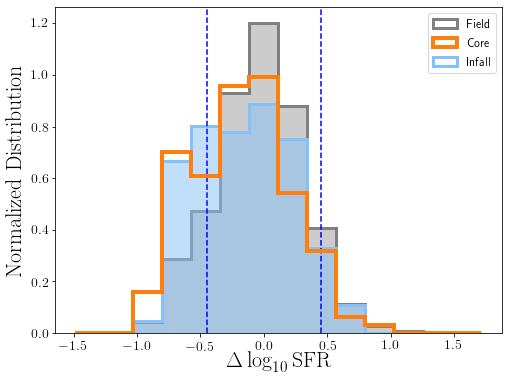

In [62]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.5
mmatch = True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True,nbins=15)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False,nbins=15)

# Figure 4 - Frac Suppressed vs environment

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54
CORE
frac suppressed = 0.226, -0.034,0.038
INFALL
0.25277777777777777 [-0.02219937  0.02356903]
FIELD
0.11871227364185111 [-0.00262338  0.00267452]
(2,)

#####  WITH BT CUT  ######

CORE
frac suppressed = 0.110, -0.030,0.039
INFALL
0.11961722488038277 [-0.02065536  0.02427806]
FIELD
0.05083836351441985 [-0.00176905  0.0018293 ]
(2,)


<Figure size 489.6x360 with 0 Axes>

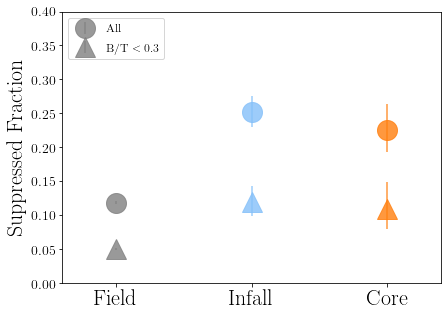

In [63]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1-mmatch.png'
    b.plot_frac_suppressed(massmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    print()
    print('#####  WITH BT CUT  ######')
    print()
    btcut = 0.3
    b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=True)
    plt.ylim(0,.4)
    plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T<0.3$'],loc='upper left')
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
    outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
    b.plot_frac_suppressed(massmatch=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    print()
    print('#####  WITH BT CUT  ######')
    print()
    btcut = 0.3
    b.plot_frac_suppressed(BTcut=btcut,plotsingle=False,massmatch=False)
    plt.ylim(0,.4)
    plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T<0.3$'],loc='upper left')
    plt.savefig(outfile1)
    plt.savefig(outfile2)

# Figure 4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54
COMPARING PROPERTIES OF NORMAL AND LOW GALAXIES
	 field, core, infall
	 BT
	 field, core, infall
	 logMstar
KS results:  Ks_2sampResult(statistic=0.4109173041894353, pvalue=0.0)
AD results:  Anderson_ksampResult(statistic=1392.8389930668716, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS results:  Ks_2sampResult(statistic=0.5264759586122946, pvalue=1

<Figure size 489.6x360 with 0 Axes>

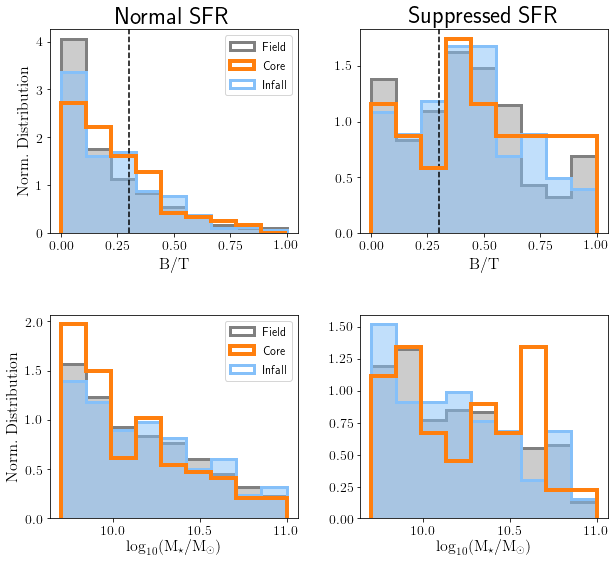

In [64]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr -11.5
mmatch=True
if mmatch:
    b.compare_morph_mmatch(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75-mmatch.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)

# Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.40347322720694645, pvalue=1.5573890643214754e-189)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.04242622701945942, pvalue=9.419813351845936e-13)
CPU times: user 57.5 s, sys: 158 ms, total: 57.7 s
Wall time: 54.6 s


<Figure size 489.6x360 with 0 Axes>

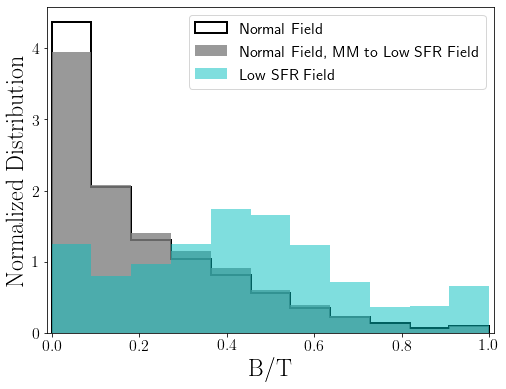

In [65]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr -11.5

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54

Field
r=nan, pvalue=nan

Core
r=-0.2670, pvalue=1.613e-03

Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank
CPU times: user 26.2 s, sys: 175 ms, total: 26.3 s
Wall time: 23.2 s


<Figure size 489.6x360 with 0 Axes>

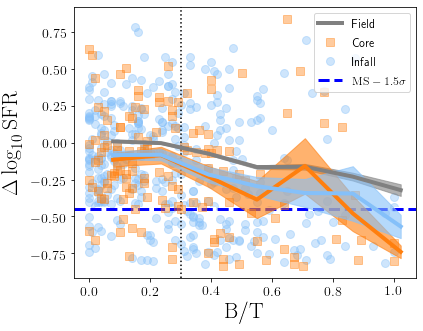

In [66]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.5

mmatch = True
if mmatch:
    xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.3,mmatch=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75-mmatch.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)
else:
    xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.3,mmatch=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
    outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
    plt.savefig(outfile1)
    plt.savefig(outfile2)

# Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

Field: median = -0.0022-0.0020+0.0026 (bootstrap)
Field: mean, std, std_err = 0.0030,0.2897,0.0030 


Core: median = -0.1621-0.0313+0.0583 (bootstrap)
Core: mean, std, std_err = -0.1273,0.3503,0.0378 


Infall: median = -0.0845-0.0246+0.0308 (bootstrap)
Infall: mean, std, std_err = -0.0904,0.3352,0.0228 

KS STATISTICS: FIELD VS CORE
K

<Figure size 489.6x360 with 0 Axes>

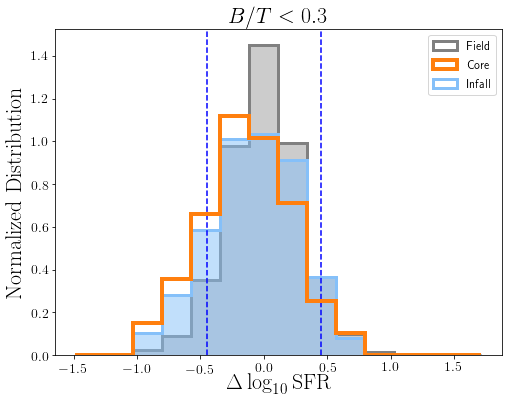

In [67]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .3 --minmass 9.7 --ellip 0.75 --minssfr -11.5
mmatch=True
if mmatch:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75-mmatch.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)
else:
    outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.pdf'
    outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p3-e0p75.png'
    b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=False)
    

# Figure 8

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

TESTING

###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.13, pvalue=6.26e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.10479487436254643, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_l

<Figure size 489.6x360 with 0 Axes>

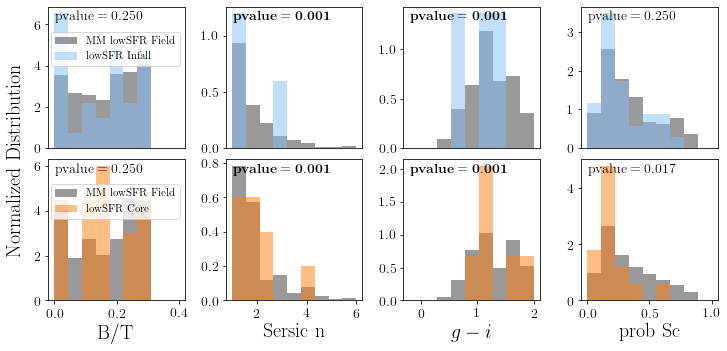

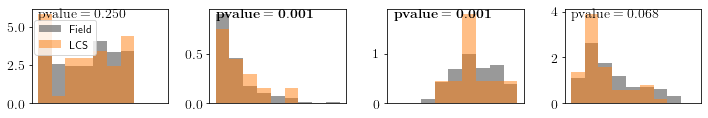

In [73]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)

# mass matching built in

b.compare_BT_lowsfr_field_mmatch(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)

b.compare_BT_lowsfr_field_match(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
    
plt.savefig(outfile1)
plt.savefig(outfile2)



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

TESTING

###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.13, pvalue=6.26e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.10479487436254643, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_l

<Figure size 489.6x360 with 0 Axes>

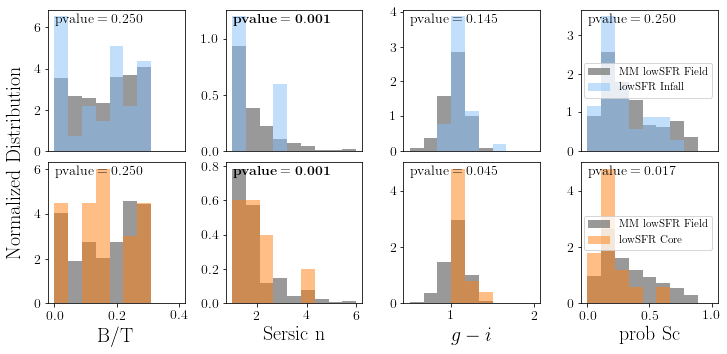

In [87]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)

# mass matching built in

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p3-e0p75.png'
    
plt.savefig(outfile1)
plt.savefig(outfile2)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
galaxies in slice < # requested 14 30 11.044
###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.08, pvalue=9.43e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.7258552614926209, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.7

<Figure size 489.6x360 with 0 Axes>

<Figure size 864x288 with 0 Axes>

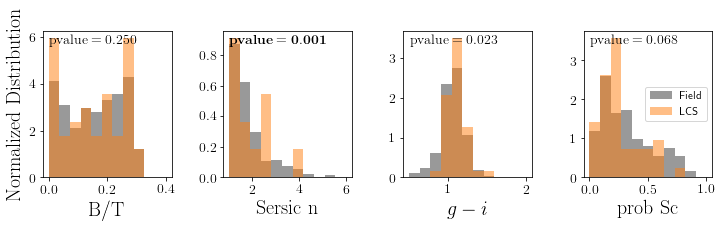

In [86]:
%%time
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.75 --minssfr -11.5 
# use full sample of LCS (not split by core/infall)

plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)
b.compare_BT_lowsfr_field_core(nbins=12,coreonly=False,infallonly=False,BTmax=btmax,plotsingle=True,nrow=1,show_xlabel=True)
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)


outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p3-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p3-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# Figure 9

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52

best-field line for field = -0.204+/-0.018

Spearman Rank test between dSFR and HIdef for field:
SpearmanrResult(correlation=-0.21518148871915138, pvalue=1.4029080974670666e-26)

Spearman Rank test between dSFR and HIdef for core:
SpearmanrResult(correlation=-0.005159958720330237, pvalue=0.9837879533049654)

Spearman Rank test between 

<Figure size 489.6x360 with 0 Axes>

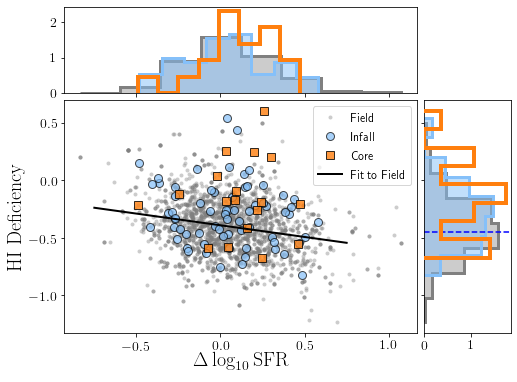

In [94]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --HIdef --minssfr -11.5 --cutBT --BT 0.3
b.compare_HIdef()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54


AttributeError: 'Line2D' object has no property 'x'

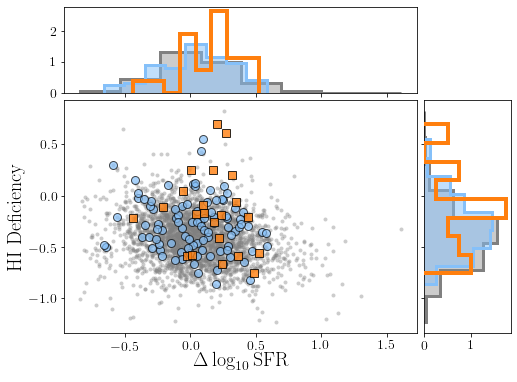

In [92]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --HIdef --minssfr -11.5
b.compare_HIdef()

# Figure 10

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
$Field$$\ norm$: 0.589 + 0.010 - 0.010
$Field$$\ low$: 0.282 + 0.032 - 0.035
$Infall$$\ norm$: 0.434 + 0.040 - 0.041
$Infall$$\ low$: 0.038 + 0.024 - 0.058
$Core$$\ norm$: 0.362 + 0.067 - 0.072
$Core$$\ low$: 0.077 + 0.047 - 0.108
CPU times: user 9.09 s, sys: 252 ms, total: 9.34 s
Wall time: 5.22 s


<Figure size 489.6x360 with 0 Axes>

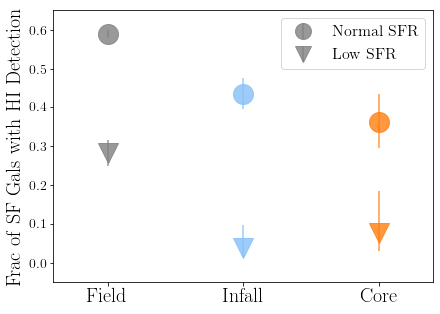

In [71]:
%%time 
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
#%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5 
b.get_HIfrac_SFR_env(plotsingle=True)
plt.ylim(-0.05,.65)
figname1 = homedir+'/research/LCS/plots/frac-HI-SFR-env.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-SFR-env.pdf'
plt.savefig(figname1)
plt.savefig(figname2)

# Figure 11

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number in parent sample =  302
number in low SFR sample =  46
number in normal SFR sample =  256
just checking, number of low sfr sample = 46
just checking, number of normal sfr sample = 256

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.6132944910610858, critical_values=array([0.325, 1.226, 1.961, 2

<Figure size 489.6x360 with 0 Axes>

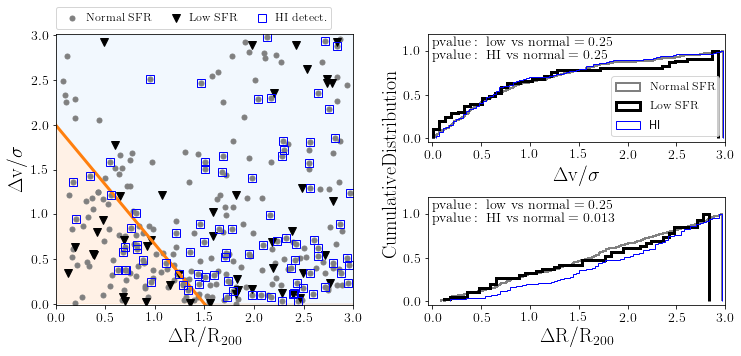

In [72]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .3 --cutBT --ellip .75 --HIdef --minssfr -11.5
#%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=True)

Thinking about a phase space diagram that is colored by 

* fraction of normal galaxies with HI detections.

* fraction of suppressed galaxies

In [127]:
from scipy.stats import binned_statistic_2d
xdata = np.random.uniform(0,3,1000)
ydata = np.random.uniform(0,3,1000)
mybins = np.linspace(0,3,15)
stat = binned_statistic_2d(xdata,ydata,np.ones(len(xdata)),statistic='sum',bins=mybins)

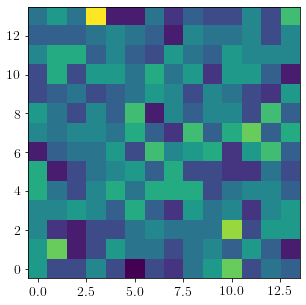

In [128]:
plt.imshow(stat[0],origin='lower')

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
CPU times: user 8.51 s, sys: 208 ms, total: 8.72 s
Wall time: 5.02 s


<Figure size 489.6x360 with 0 Axes>

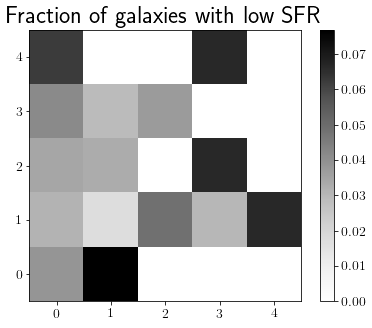

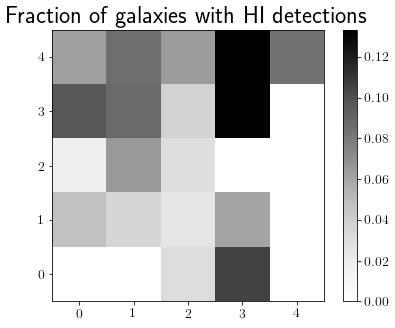

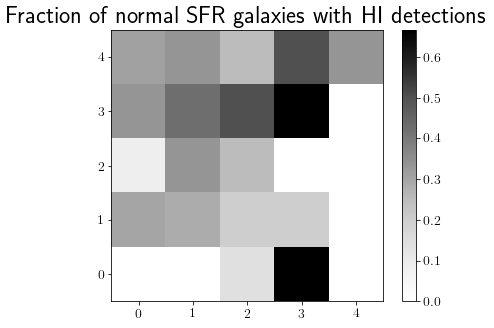

In [138]:
%%time
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .3 --cutBT --ellip .75 --HIdef --minssfr -11.5
#%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --minssfr -11.5
#figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
#figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_2d_image_phasespace(nbins=6)

# Figure 12 - cutting this

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
STD of pruned data = 0.16
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.50
Best-fit inter = -5.13
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.50+/-0.05
Best-fit inter = -5.13+/-0.53
cluster MKW11: nlow = 0, ntot = 6
cluster MKW8: nlow = 0, ntot = 1
cluster AWM4: nlow = 0, ntot = 2
cluster A2063: nlow = 2, ntot = 19
cluster A2052: nlow = 3, ntot = 4
cluster NGC6107: nlow = 0, ntot = 6
cluster Coma: nlow = 1, ntot = 17
cluster A1367: nlow = 4, ntot = 12
cluster Hercules: nlow = 3, ntot = 31


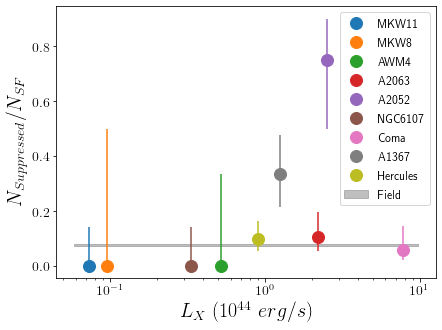

In [150]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-suppressed-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-suppressed-Lx.pdf'
b.frac_suppressed_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.19
STD of full data = 0.20
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.39
Best-fit inter = -4.12
Width of the MS = 0.20 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.39+/-0.06
Best-fit inter = -4.12+/-0.55


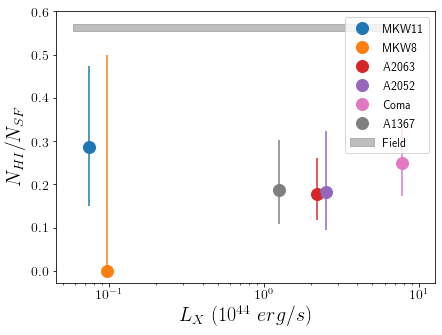

In [152]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef 
figname1 = homedir+'/research/LCS/plots/frac-HI-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-Lx.pdf'
b.frac_HI_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.18
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.16
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.05
Best-fit inter = -4.16+/-0.54


<Figure size 489.6x360 with 0 Axes>

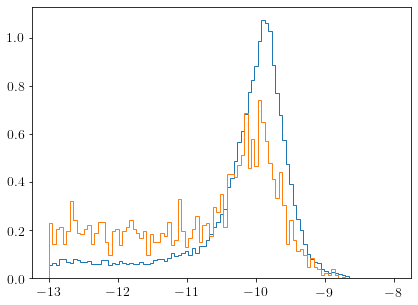

In [143]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef 
plt.figure()
mybins = np.linspace(-13,-8,100)
t = plt.hist(b.gsw.ssfr,bins=mybins,normed=True,histtype='step')
t = plt.hist(b.lcs.ssfr,bins=mybins,normed=True,histtype='step')